# Finding optimal hyper parameters for a CNN model

The point of this notebook is to obtain an optimal set of parameters for our CNN model to process time based series data. Specifically, we are processing IoT data from TON a well-kept dataset from The UNSW Group in Canberra, Australia.

The specific dataset being discussed here is the IoT Weather dataset.



We have pip install mealpy each time because it is not a default python package ,and every time the runtime refreshes; the package is uninstalled.

In [ ]:
%pip install mealpy==3.0.1
%pip install -U scikit-learn
%pip install imbalanced-learn
%pip install matplotlib
%pip install tensorflow

Our main libraries used are:

*   Imblearn
*   Pandas
*   Matplot Lib
*   MealPy
*   Numpy
*   SKLearn
*   Tensorflow
*   Time


In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
import numpy
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from mealpy import FloatVar, SOA
import time

# Preparing the Datasets for the CNN Model

We split off the information that indicates whether or not an attack has occured (*label*) and the types of attacks (*type*).
Now there are three dataframes:
  X - all features
  y - attack or not
  y_type - type of attack

We split again into test and train data sets and include some randomness.
**Reset_index** drops the indexes from these new dataframes.
Next, we encode the text data, add another randomness, and scale all dataframes. The X dataframe is reshaped.

In [ ]:
#Uncomment for local use
#raw_data = pandas.read_csv('../../Train_Test_IoT_dataset/Train_Test_IoT_Weather.csv')
#Uncomment for Google Colab
raw_data = pandas.read_csv('Train_Test_IoT_Weather.csv')
X = raw_data.drop(columns=['label','type'])
y = raw_data['label']
y_type = raw_data['type']

In [ ]:
# Binary
X_train, X_testsplit, y_train, y_testsplit = train_test_split(X, y, test_size=0.2, random_state=777)
# Binary validation
X_test, X_validation, y_test, y_validation = train_test_split(X_testsplit, y_testsplit, test_size=0.5, random_state=777)

#drop index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_validation = X_validation.reset_index(drop=True)
y_validation = y_validation.reset_index(drop=True)

In [ ]:
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_test_encode = encoder.fit_transform(X_test)
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.fit_transform(y_test)
X_validation_encode = encoder.fit_transform(X_validation)
y_validation_encode = label_encoder.fit_transform(y_validation)

In [ ]:
smotetomek = SMOTETomek(random_state=777)
X_rebalance, y_rebalance = smotetomek.fit_resample(X_train_encode, y_train_encode)

In [ ]:
scaler = StandardScaler()
X_rebalance = scaler.fit_transform(X_rebalance)
X_test_encode = scaler.transform(X_test_encode)

X_validation_encode = scaler.transform(X_validation_encode)

In [ ]:
X_rebalance = X_rebalance.reshape(X_rebalance.shape[0], X_rebalance.shape[1], 1)
X_test_encode = X_test_encode.reshape(X_test_encode.shape[0], X_test_encode.shape[1], 1)

X_validation_encode = X_validation_encode.reshape(X_validation_encode.shape[0], X_validation_encode.shape[1], 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 3, 50)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 50)          │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,633 (248.57 KB)

 Trainable params: 63,533 (248.18 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/70
608/608 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4962 - loss: 0.6956 - val_accuracy: 0.4218 - val_loss: 0.6942
Epoch 2/70
608/608 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4936 - loss: 0.6951 - val_accuracy: 0.6159 - val_loss: 0.6919
Epoch 3/70
608/608 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4995 - loss: 0.6944 - val_accuracy: 0.6159 - val_loss: 0.6901
Epoch 4/70
608/608 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5088 - loss: 0.6934 - val_accuracy: 0.6159 - val_loss: 0.6885
Epoch 5/70
608/608 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5125 - loss: 0.6928 - val_accuracy: 0.6159 - val_loss: 0.6873
Epoch 6/70
608/608 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5120 - loss: 0.6926 - val_accuracy: 0.6159 - val_loss: 0.6861
Epoch 7/70
608/608 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5231 - loss: 0.6921 - val_accuracy: 0.6159 - val_loss: 0.6853
Epoch 8/70
608/608 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5329 - loss: 0.6913 - val_accuracy: 0

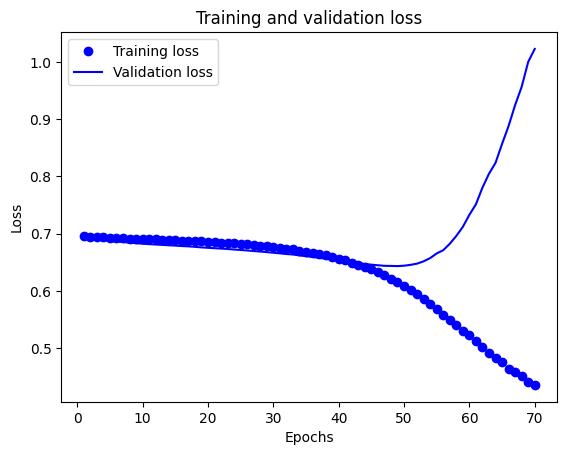

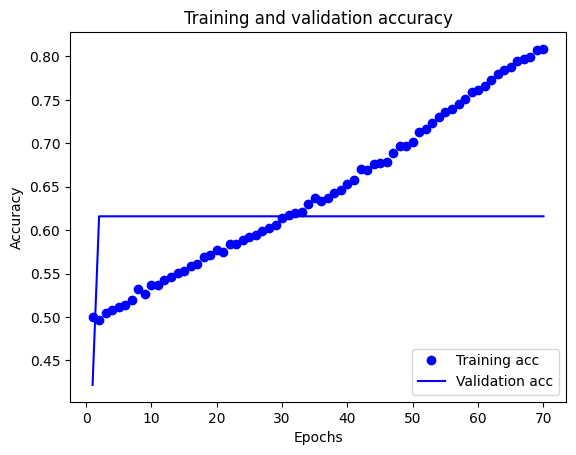


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1522
           1       0.61      1.00      0.76      2404

    accuracy                           0.61      3926
   macro avg       0.31      0.50      0.38      3926
weighted avg       0.37      0.61      0.47      3926


Confusion Matrix
[[   0 1522]
 [   0 2404]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


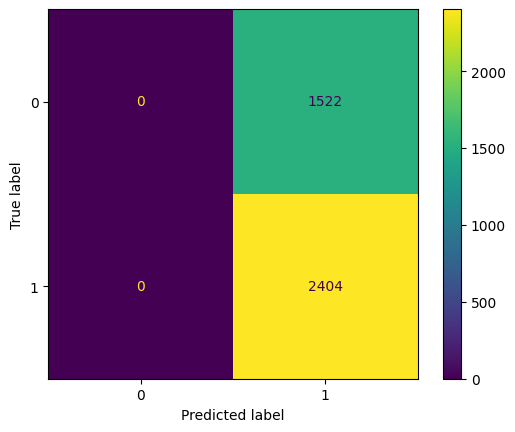

Time taken: 356.8528 seconds


In [ ]:
start_time_1 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=50, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(512, activation='relu'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time1 = time.perf_counter()
print(f"Time taken: {end_time1 - start_time_1:0.4f} seconds")

# Optimizing the model
Instead of looking at random number ranges for learning rates, filters, and hidden units, we have encoded specific values.

The hyper parameters we are attempting to optimize are:

*   Batch Size
*   Activation Functions
*   Learning Rates
*   Filters
*   Hidden Units


The base CNN model we made is ingested into *objective_function*.
  This is where our hyper parameters are being considered.
  It returns the Accuracy of that particular iteration.
**LB** and **UB** is set according to the list given above.



In [ ]:
BATCH_ENCODER = LabelEncoder()
BATCH_ENCODER.fit([32, 64, 128])

#act encoder --> Which activation function should be used?
ACT_ENCODER = LabelEncoder()
ACT_ENCODER.fit(['softmax', 'softplus', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

#Learning Rate encoder
LR_ENCODER = LabelEncoder()
LR_ENCODER.fit([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1])

#Filter encoder
FILTER_ENCODER = LabelEncoder()
FILTER_ENCODER.fit([25, 50, 75])

#Hidden Units encoder
HIDDEN_ENCODER = LabelEncoder()
HIDDEN_ENCODER.fit([400, 512, 640])

def objective_function(params):
  '''RULES:
      Batch Size - 32, 64, 128
      Activation - softmax, softplus, relu, tanh, sigmoid, hard_sigmoid, linear
      Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1
      Filters - 25, 50, 75
      Hidden Units - 400, 512, 640
      Dense Layers - 5, 8, 10
  '''
  batch_size = BATCH_ENCODER.inverse_transform([int(params[0])])[0]
  activation = ACT_ENCODER.inverse_transform([int(params[1])])[0]
  learning_rate = LR_ENCODER.inverse_transform([int(params[2])])[0]
  filter = FILTER_ENCODER.inverse_transform([int(params[3])])[0]
  hidden_units = HIDDEN_ENCODER.inverse_transform([int(params[4])])[0]

  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1], X_rebalance.shape[2]))),
  model.add(tensorflow.keras.layers.Conv1D(filters=filter, kernel_size=3, activation='sigmoid')),
  model.add(tensorflow.keras.layers.MaxPooling1D(pool_size=2)),
  model.add(tensorflow.keras.layers.Dropout(0.3)),
  model.add(tensorflow.keras.layers.BatchNormalization()),
  model.add(tensorflow.keras.layers.LSTM(64)),
  model.add(tensorflow.keras.layers.Flatten()),
  model.add(tensorflow.keras.layers.Dense(int(hidden_units), activation=activation)),
  model.add(tensorflow.keras.layers.Dropout(0.5)),
  model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))


  optimizer = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(X_rebalance, y_rebalance, batch_size=batch_size, epochs=15, validation_data=(X_validation_encode, y_validation_encode), verbose=0)
  min_validation_accuracy = 1-history.history['val_accuracy'][-1]
  print(f"Accuracy {min_validation_accuracy}")
  return min_validation_accuracy

LB = [0, 0, 0, 0, 0]
UB = [2.99, 6.99, 5.99, 2.99, 2.99]

problem_dict = {
    "obj_func": objective_function,
    "bounds": FloatVar(lb=LB, ub=UB),
    "minmax": "min",
    "verbose": True
}

model = SOA.OriginalSOA(epoch=15, pop_size=20)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")
model.history.save_global_objectives_chart(filename="hello/goc")
model.history.save_local_objectives_chart(filename="hello/loc")

model.history.save_global_best_fitness_chart(filename="hello/gbfc")
model.history.save_local_best_fitness_chart(filename="hello/lbfc")

model.history.save_runtime_chart(filename="hello/rtc")

model.history.save_exploration_exploitation_chart(filename="hello/eec")

model.history.save_diversity_chart(filename="hello/dc")


KeyboardInterrupt: 

# Output from Optimizer
INFO:mealpy.bio_based.SOA.OriginalSOA:Solving single objective optimization problem.
Accuracy 0.3863983750343323
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.09526234865188599
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.15511971712112427
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 1, Current best: 0.15511971712112427, Global best: 0.09526234865188599, Runtime: 1801.93724 seconds"
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 2, Current best: 0.38410598039627075, Global best: 0.09526234865188599, Runtime: 1721.95777 seconds"
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 3, Current best: 0.38410598039627075, Global best: 0.09526234865188599, Runtime: 1936.62859 seconds"
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 4, Current best: 0.38410598039627075, Global best: 0.09526234865188599, Runtime: 1555.38946 seconds"
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6057055592536926
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 5, Current best: 0.38410598039627075, Global best: 0.09526234865188599, Runtime: 1481.01260 seconds"
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6128374934196472
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 6, Current best: 0.38410598039627075, Global best: 0.09526234865188599, Runtime: 1672.21385 seconds"
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 7, Current best: 0.38410598039627075, Global best: 0.09526234865188599, Runtime: 1491.01128 seconds"
Accuracy 0.5894039869308472
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 8, Current best: 0.38410598039627075, Global best: 0.09526234865188599, Runtime: 1602.24626 seconds"
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 9, Current best: 0.38410598039627075, Global best: 0.09526234865188599, Runtime: 1582.10165 seconds"
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.5354049801826477
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 10, Current best: 0.38410598039627075, Global best: 0.09526234865188599, Runtime: 1966.72221 seconds"
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 11, Current best: 0.38410598039627075, Global best: 0.09526234865188599, Runtime: 1609.05829 seconds"
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.5012735724449158
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 12, Current best: 0.38410598039627075, Global best: 0.09526234865188599, Runtime: 1939.00944 seconds"
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 13, Current best: 0.38410598039627075, Global best: 0.09526234865188599, Runtime: 1596.16097 seconds"
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.6158940494060516
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 14, Current best: 0.38410598039627075, Global best: 0.09526234865188599, Runtime: 1726.76523 seconds"
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.38410598039627075
Accuracy 0.08558326959609985
"INFO:mealpy.bio_based.SOA.OriginalSOA:>>>Problem: P, Epoch: 15, Current best: 0.08558326959609985, Global best: 0.08558326959609985, Runtime: 693.76127 seconds"
Accuracy 0.4401426315307617
"Solution: [2.57544766 2.8637734  1.2241704  0.3055468  1.9536012 ], Fitness: 0.08558326959609985"
"Solution: [2.57544766 2.8637734  1.2241704  0.3055468  1.9536012 ], Fitness: 0.08558326959609985"


Solution: [2.57544766 2.8637734  1.2241704  0.3055468  1.9536012 ], Fitness: 0.08558326959609985

Batch Size - 32, 64, **128**

Activation - softmax, softplus, **relu**, tanh, sigmoid, hard_sigmoid, linear

Learning Rate - 0.0005, **0.001**, 0.005, 0.01, 0.05, 0.1

Filters - **25**, 50, 75

Hidden Units - 400, **512**, 640

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 3, 25)          │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 25)          │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,033 (222.79 KB)

 Trainable params: 56,983 (222.59 KB)

 Non-trainable params: 50 (200.00 B)

Epoch 1/70
304/304 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5306 - loss: 0.6930 - val_accuracy: 0.6159 - val_loss: 0.6888
Epoch 2/70
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6830 - loss: 0.6807 - val_accuracy: 0.6159 - val_loss: 0.6815
Epoch 3/70
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7881 - loss: 0.6687 - val_accuracy: 0.6159 - val_loss: 0.6766
Epoch 4/70
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8511 - loss: 0.6561 - val_accuracy: 0.6159 - val_loss: 0.6720
Epoch 5/70
304/304 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8849 - loss: 0.6430 - val_accuracy: 0.6159 - val_loss: 0.6676
Epoch 6/70
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9038 - loss: 0.6291 - val_accuracy: 0.6159 - val_loss: 0.6635
Epoch 7/70
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9139 - loss: 0.6131 - val_accuracy: 0.6159 - val_loss: 0.6599
Epoch 8/70
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9238 - loss: 0.5957 - val_accuracy: 0

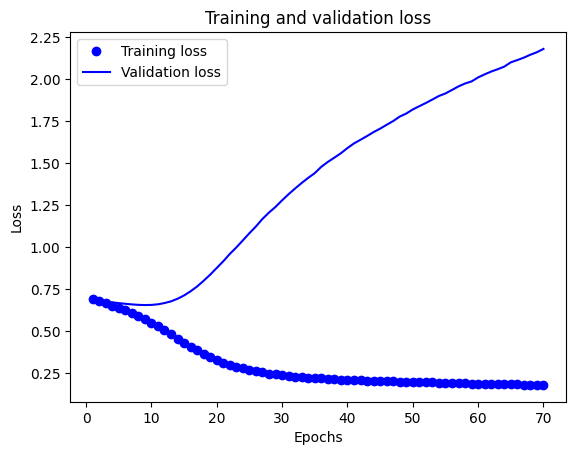

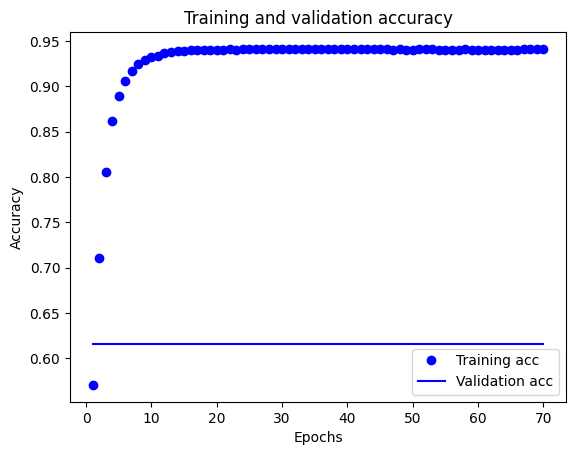


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1522
           1       0.61      1.00      0.76      2404

    accuracy                           0.61      3926
   macro avg       0.31      0.50      0.38      3926
weighted avg       0.37      0.61      0.47      3926


Confusion Matrix
[[   0 1522]
 [   0 2404]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


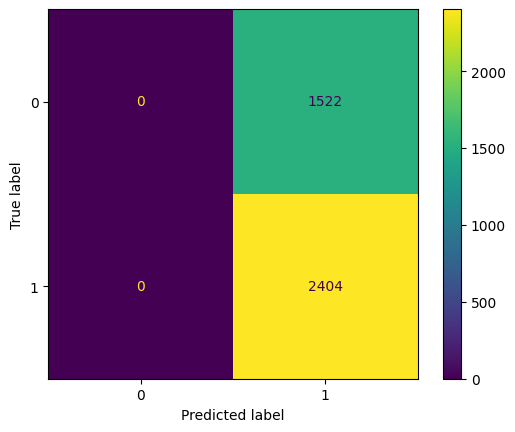

Time taken: 182.3771 seconds


In [ ]:
start_time_2 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=25, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(512, activation='relu'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=128, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time2 = time.perf_counter()
print(f"Time taken: {end_time2 - start_time_2:0.4f} seconds")